In [1]:
import numpy as np
from veg_index import Image_Multi
import matplotlib.pyplot as plt

from matplotlib import path
import matplotlib.patches as patches
from skimage import draw
import scipy.ndimage as ndimage
import Utils
import cv2

/home/dlsaavedra/anaconda3/envs/new/lib/python3.7/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)


# Load  Image

In [2]:
path_barrack = "Barrack B/"

im_red_path =  path_barrack + "result_Red.tif"
im_green_path = path_barrack + "result_Green.tif"
im_blue_path = path_barrack + "result_Blue.tif"
im_nir_path = path_barrack + "result_NIR.tif"
im_rededge_path = path_barrack + "result_RedEdge.tif"

im_multi = Image_Multi(im_red_path, im_green_path, im_blue_path, im_nir_path, im_rededge_path)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

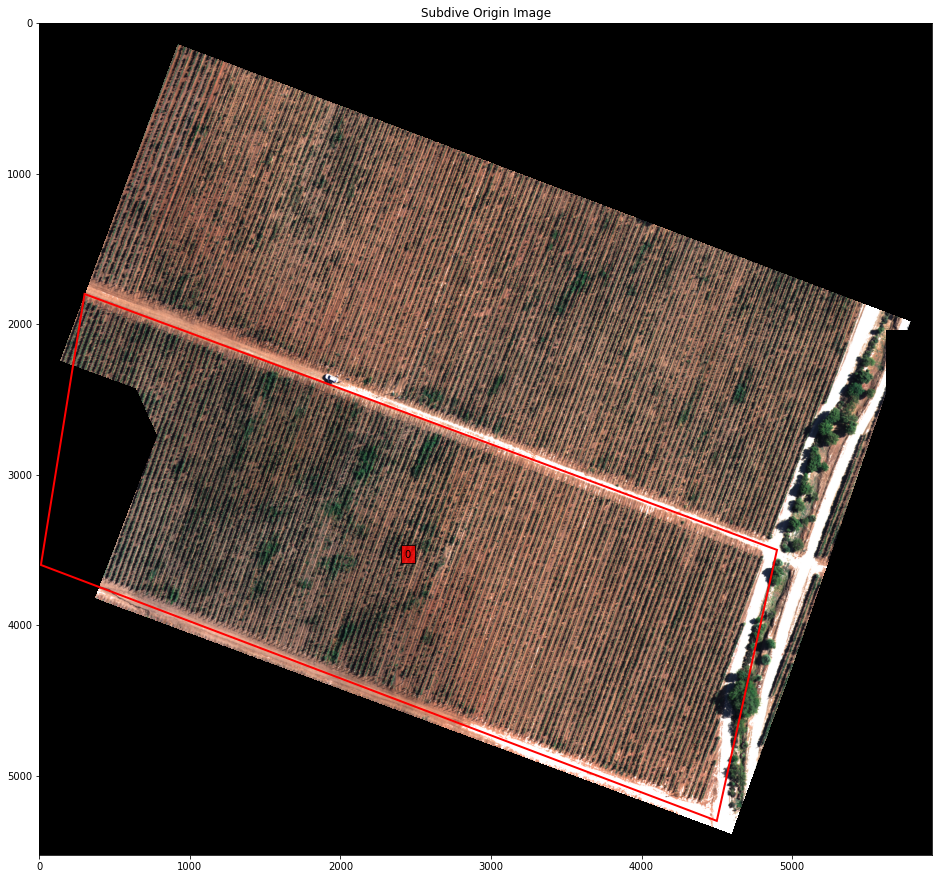

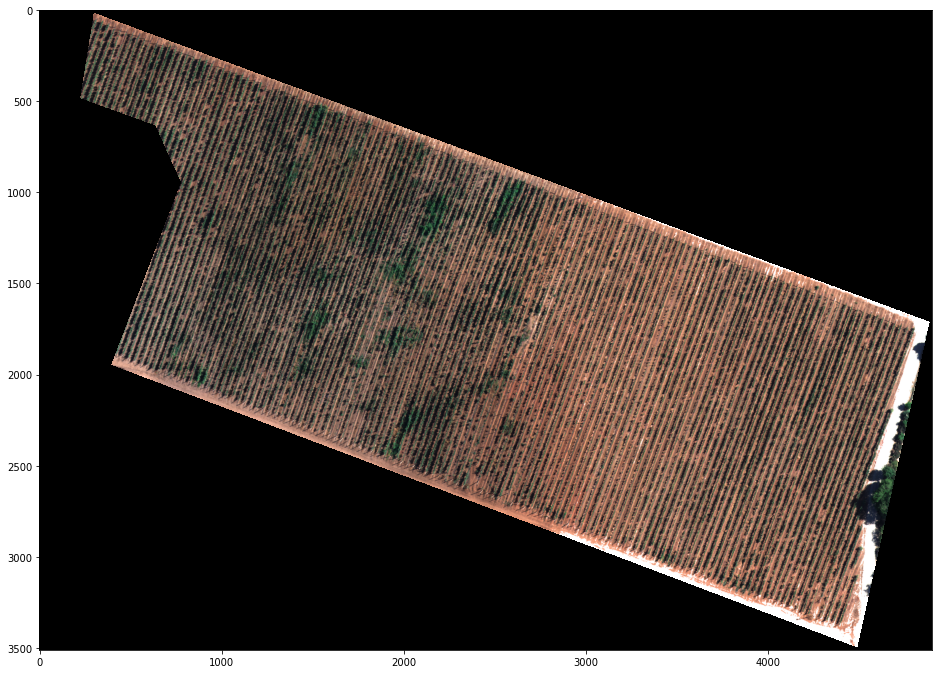

In [3]:


#### Polygon Barrack A ##############
#List_P = [(1600, 500),(4800, 3600), (1100, 1900), (5500, 1900)]
#List_P = [(500, 3700), (1000, 1900), (4900, 3600), (4000, 5500)]

#### Polygon Barrack B ##############
#List_P = [(850, 150),(5500, 1800), (4900, 3500), (300, 1800)]
List_P = [(300, 1800), (4900, 3500), (4500, 5300), (10, 3600)]



im_multi_seg = im_multi.Segmentation(List_P)

plt.figure(0)
plt.figure(figsize=(16, 16))
plt.imshow(im_multi.RGB().raster.copy())
plt.title('Subdive Origin Image')
ax = plt.gca()

for i,Poly in enumerate([List_P]):
    
    poly = patches.Polygon(Poly,
                     linewidth=2,
                     edgecolor='red',
                     fill = False)
    plt.text(np.mean([x[0]  for x in Poly]), np.mean([y[1]  for y in Poly]) , str(i),  bbox=dict(facecolor='red', alpha=0.8))

    ax.add_patch(poly)


plt.figure(1)
plt.figure(figsize=(16, 16))
plt.imshow(im_multi_seg.RGB().raster)


# Split Image

linea no encontrada
linea no encontrada


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


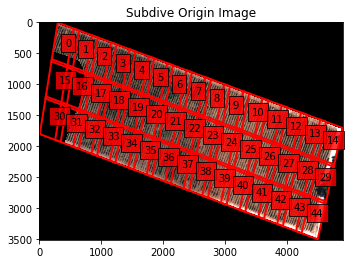

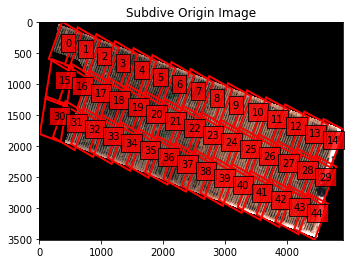

In [4]:
split_Weight, split_Height = 15, 3
overlap = 0.01

List_subdivide = im_multi_seg.subdivision_rect(split_Weight, split_Height, overlap)
List_subdivide_correct = im_multi_seg.correction_subimage(List_subdivide)

plt.figure(0)
plt.imshow(im_multi_seg.RGB().raster.copy())
plt.title('Subdive Origin Image')
ax = plt.gca()

for i,Poly in enumerate(List_subdivide):
    poly = patches.Polygon(Poly,
                     linewidth=2,
                     edgecolor='red',
                     fill = False)
    plt.text(np.mean([x[0]  for x in Poly]), np.mean([y[1]  for y in Poly]) , str(i),  bbox=dict(facecolor='red', alpha=0.8))

    ax.add_patch(poly)
    
    
plt.figure(1)
plt.imshow(im_multi_seg.RGB().raster.copy())
plt.title('Subdive Origin Image')
ax = plt.gca()

for i,Poly in enumerate(List_subdivide_correct):
    
    poly = patches.Polygon(Poly,
                     linewidth=2,
                     edgecolor='red',
                     fill = False)
    plt.text(np.mean([x[0]  for x in Poly]), np.mean([y[1]  for y in Poly]) , str(i),  bbox=dict(facecolor='red', alpha=0.8))

    ax.add_patch(poly)

# Detect Lines

/home/dlsaavedra/Desktop/Rentadrone.cl-ai-test&SomeCode/Precision_Farming/veg_index.py:228: RuntimeWarning: invalid value encountered in greater
  H2 = (NDVI > th_NDVI).astype('uint8')
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

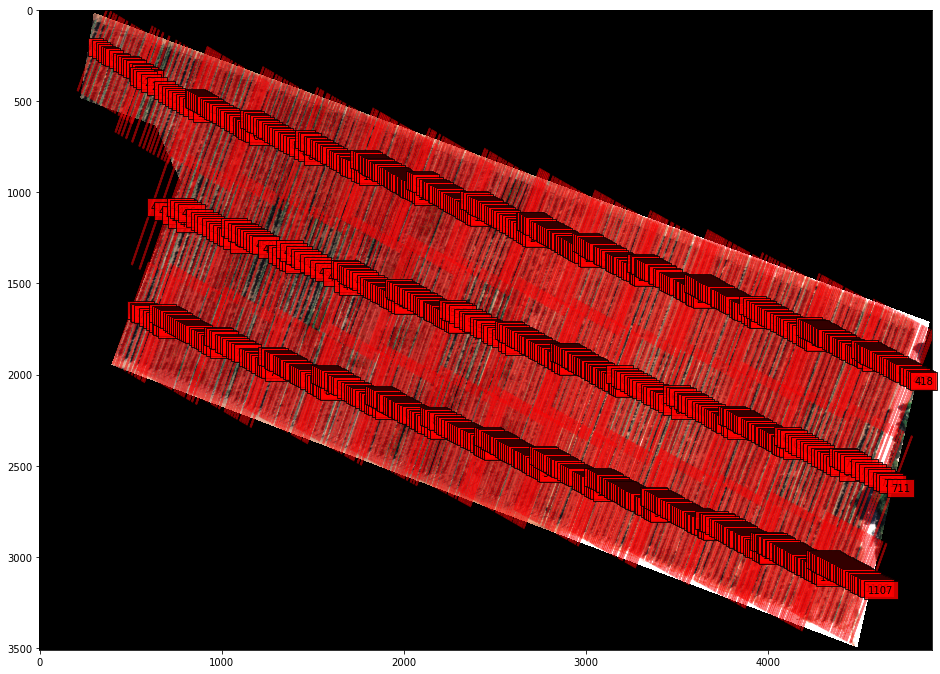

In [5]:
th_NDVI = 0.3
vertical_kernel_size_h = 10
vertical_kernel_size_w = 5
th_small_areas = 30
lines_width = 1
merge_bt_line = 10


List_lines_origin_complete = im_multi_seg.detector_lines(List_subdivide_correct,
                                                        th_NDVI,
                                                        vertical_kernel_size_h,
                                                        vertical_kernel_size_w,
                                                        th_small_areas,
                                                        lines_width,
                                                        merge_bt_line)

    
plt.figure(0)
plt.figure(figsize=(16, 16))
plt.imshow(im_multi_seg.RGB().raster)

ax = plt.gca()


for i,Poly in enumerate(List_lines_origin_complete):
    poly = patches.Polygon(Poly,
                     linewidth=2,
                     edgecolor='red',
                     alpha=0.5,
                     fill = True)
    plt.text(np.mean([x[0]  for x in Poly]), np.mean([y[1]  for y in Poly]) , str(i),  bbox=dict(facecolor='red', alpha=0.8))

    ax.add_patch(poly)

# Put Circle on Lines

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

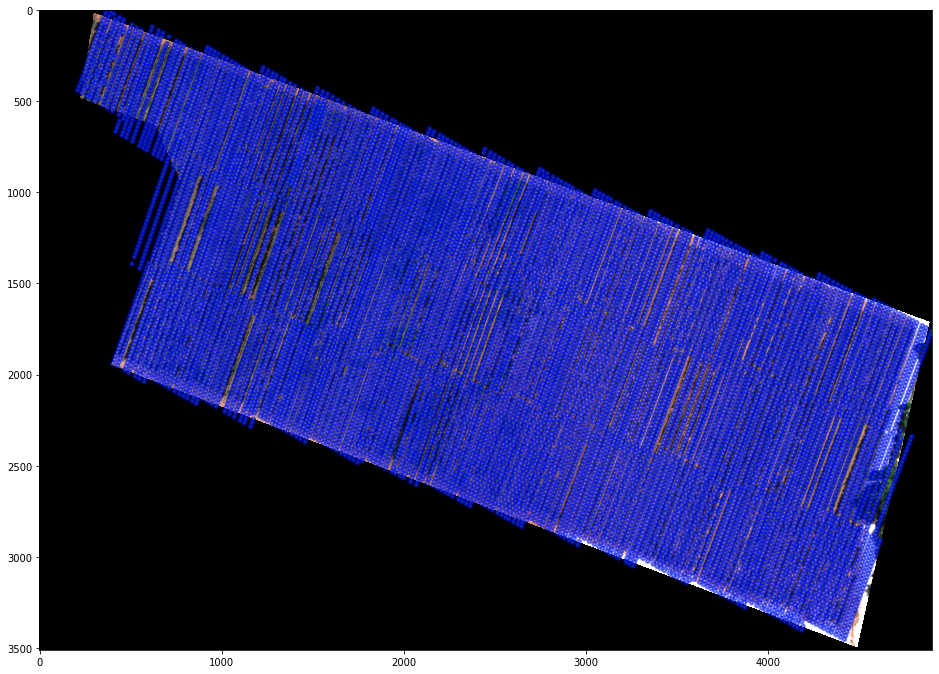

In [6]:
r_circle = 10
centers_circles = Utils.lines2circles(List_lines_origin_complete, r_circle)

#### Save Result###########
np.save('Barrack A/centers_circles.npy', centers_circles)
#centers_circles = np.load('Barrack A/centers_circles.npy')


plt.figure(0)
plt.figure(figsize=(16, 16))
plt.imshow(im_multi_seg.RGB().raster)

ax = plt.gca()


for x1, y1 in centers_circles[:,:]: 
    circle = patches.Circle((x1, y1), r_circle, 
                            linewidth=2,
                             edgecolor='blue',
                             alpha=0.5,
                             fill = True) 
    ax.add_patch(circle)

# The color of the circle depends on the NDVI

/home/dlsaavedra/anaconda3/envs/new/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Warning: converting a masked element to nan.
  if sys.path[0] == '':
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

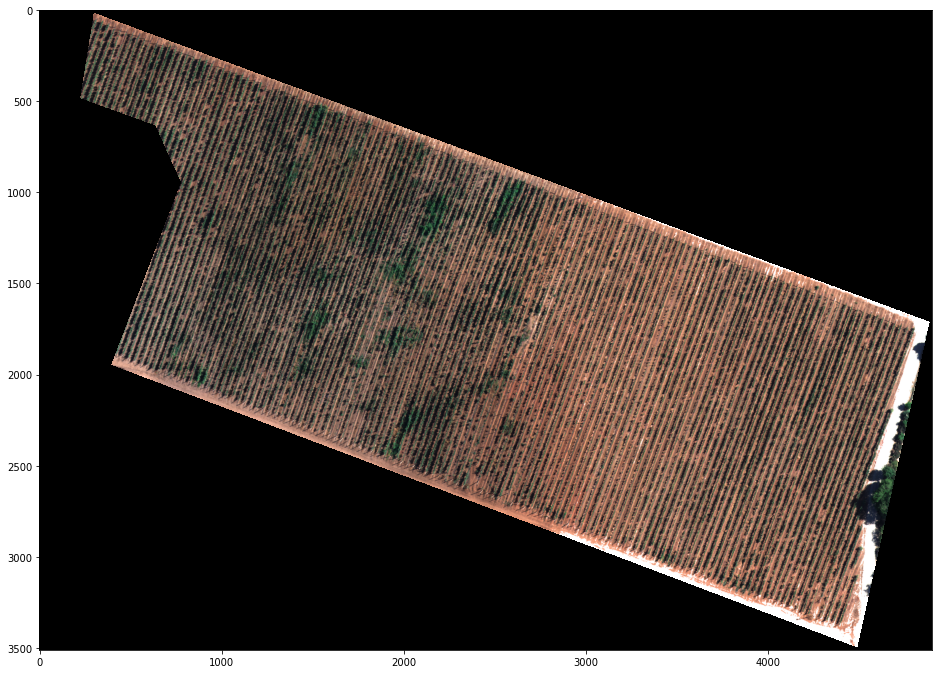

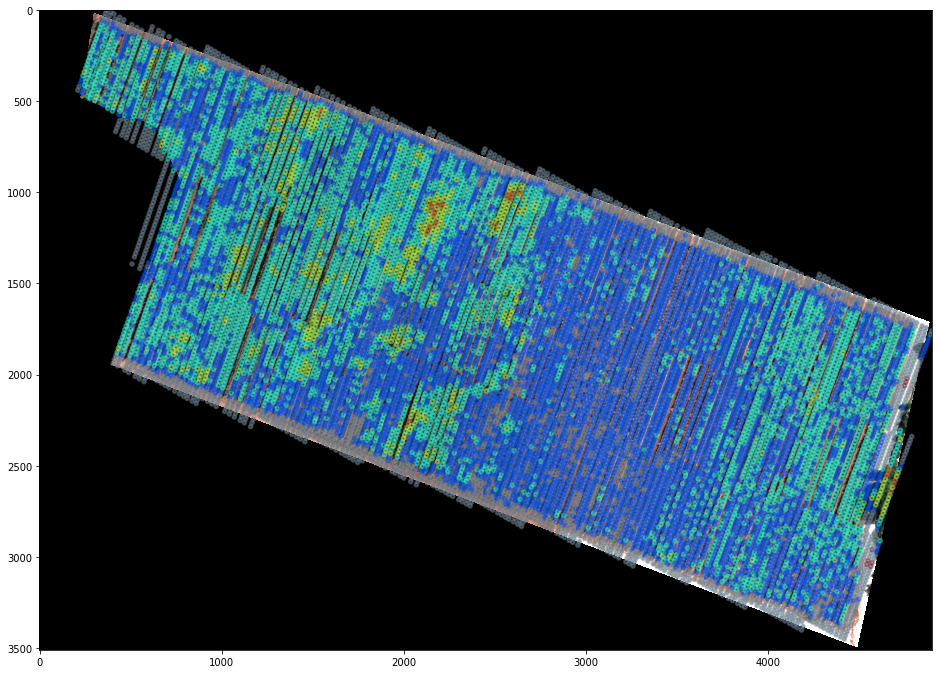

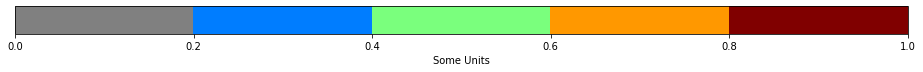

In [121]:
import matplotlib as mpl

r_circle = 10
NDVI = im_multi_seg.NDVI().raster
NDVI_circle_index = []

for c in centers_circles:

    rr, cc = draw.disk((c[1], c[0]), radius=r_circle, shape=NDVI.shape)
    NDVI_circle_index.append(np.mean(NDVI[rr, cc]))

NDVI_circle_index = np.array(NDVI_circle_index)   


n_color = 5
# create the new map
cmap = plt.cm.jet  # define the colormap
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# force the first color entry to be grey
cmaplist[0] = (.5, .5, .5, 1.0)

cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.linspace(0, 1, n_color + 1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)


NDVI_circle_index[np.isnan(NDVI_circle_index)] = 0
inds = np.digitize(NDVI_circle_index, bounds ,right=False)
NDVI_circle_index_new = [bounds[i-1] for i in inds]



plt.figure(0)
plt.figure(figsize=(16, 16))
plt.imshow(im_multi_seg.RGB().raster)

ax = plt.gca()

plt.figure(1)
plt.figure(figsize=(16, 16))
plt.imshow(im_multi_seg.RGB().raster)
ax = plt.gca()

for i, (x1, y1) in enumerate(centers_circles[:,:]): 
    circle = patches.Circle((x1, y1), r_circle, 
                            linewidth=2,
                             edgecolor= cmap(NDVI_circle_index_new[i]),
                             alpha=0.5,
                             fill = True) 
    ax.add_patch(circle)
    
    
    
fig, ax = plt.subplots(figsize=(16, 1))
fig.subplots_adjust(bottom=0.5)

fig.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=norm),boundaries=bounds, ticks=bounds,
             cax=ax, orientation='horizontal', label='Some Units')




Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

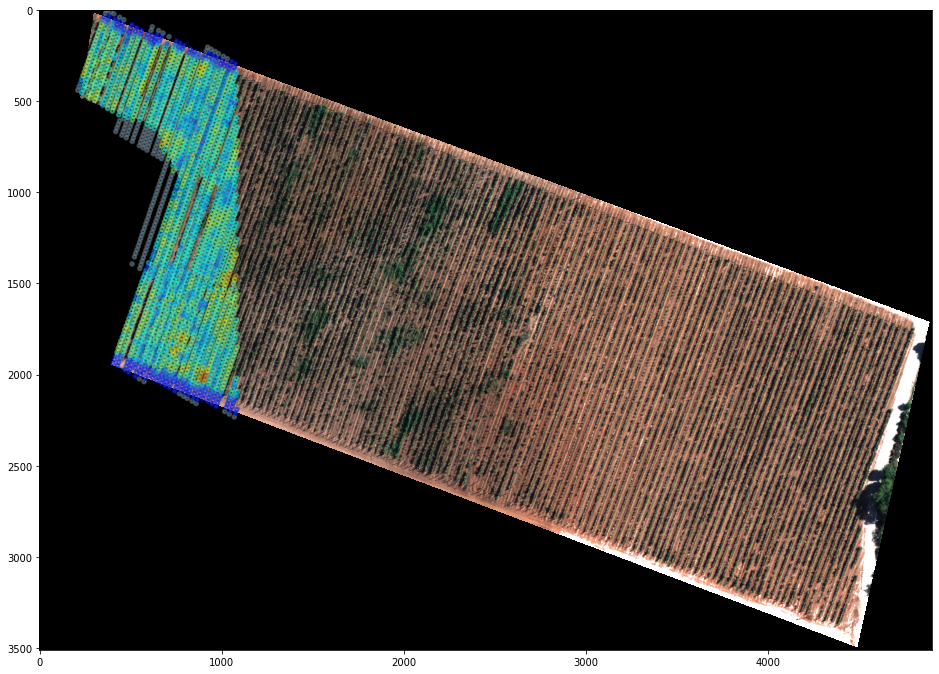

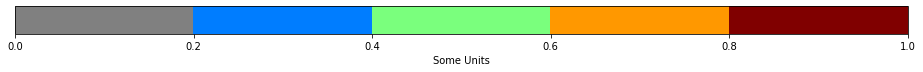

In [122]:
plt.figure(1)
plt.figure(figsize=(16, 16))
plt.imshow(im_multi_seg.RGB().raster)
ax = plt.gca()

for i, (x1, y1) in enumerate(centers_circles[:2000,:]): 
    circle = patches.Circle((x1, y1), r_circle, 
                            linewidth=2,
                             edgecolor= cmap(NDVI_circle_index[i]),
                             alpha=0.5,
                             fill = True) 
    ax.add_patch(circle)
    
    
    
fig, ax = plt.subplots(figsize=(16, 1))
fig.subplots_adjust(bottom=0.5)

fig.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=norm),boundaries=bounds, ticks=bounds,
             cax=ax, orientation='horizontal', label='Some Units')



# The color of the circle depends on the OSAVI


/home/dlsaavedra/anaconda3/envs/new/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Warning: converting a masked element to nan.
  # Remove the CWD from sys.path while we load stuff.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

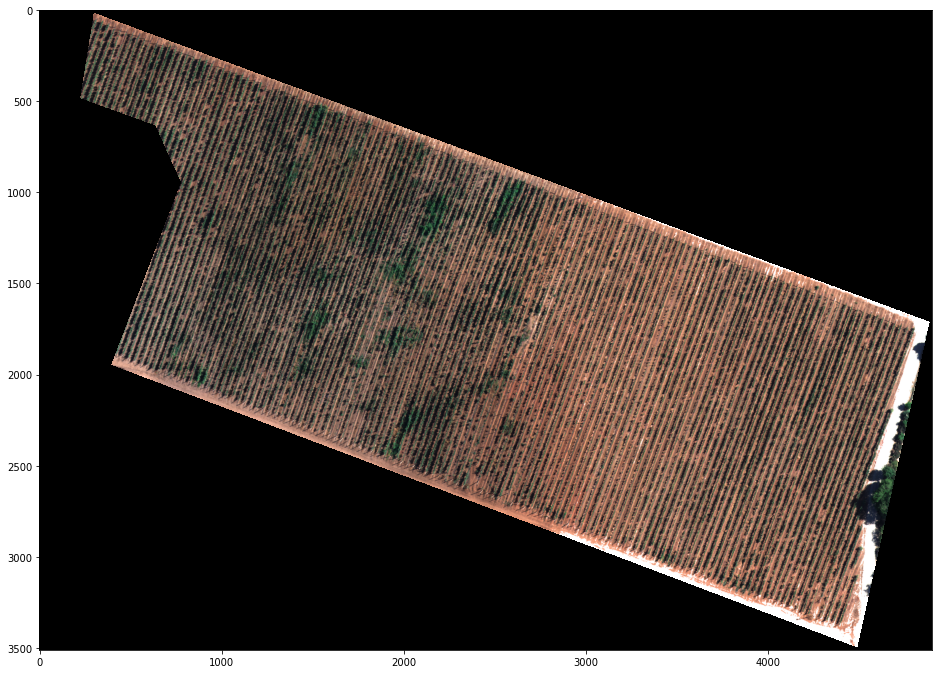

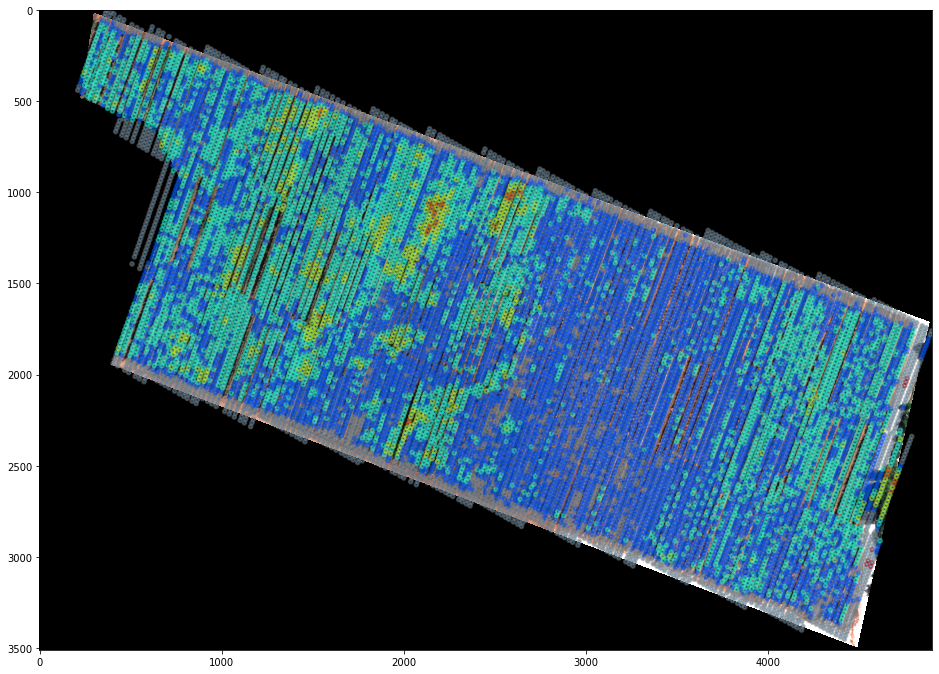

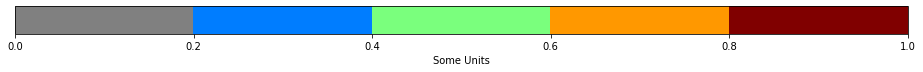

In [124]:

r_circle = 10
NDVI = im_multi_seg.OSAVI().raster
NDVI_circle_index = []

for c in centers_circles:

    rr, cc = draw.disk((c[1], c[0]), radius=r_circle, shape=NDVI.shape)
    NDVI_circle_index.append(np.mean(NDVI[rr, cc]))
    
NDVI_circle_index = np.array(NDVI_circle_index)  



n_color = 5
# create the new map
cmap = plt.cm.jet  # define the colormap
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# force the first color entry to be grey
cmaplist[0] = (.5, .5, .5, 1.0)

cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.linspace(0, 1, n_color + 1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)


NDVI_circle_index[np.isnan(NDVI_circle_index)] = 0
inds = np.digitize(NDVI_circle_index, bounds ,right=False)
NDVI_circle_index_new = [bounds[i-1] for i in inds]


    
plt.figure(0)
plt.figure(figsize=(16, 16))
plt.imshow(im_multi_seg.RGB().raster)

ax = plt.gca()

plt.figure(1)
plt.figure(figsize=(16, 16))
plt.imshow(im_multi_seg.RGB().raster)
ax = plt.gca()

for i, (x1, y1) in enumerate(centers_circles[:,:]): 
    circle = patches.Circle((x1, y1), r_circle, 
                            linewidth=2,
                             edgecolor= cmap(NDVI_circle_index_new[i]),
                             alpha=0.5,
                             fill = True) 
    ax.add_patch(circle)
    
    
    
fig, ax = plt.subplots(figsize=(16, 1))
fig.subplots_adjust(bottom=0.5)

fig.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=norm),boundaries=bounds, ticks=bounds,
             cax=ax, orientation='horizontal', label='Some Units')



(array([ 570.,  821., 1529., 3251., 3807., 2508., 1006.,  339.,  136.,
          43.]),
 array([-0.0055115 ,  0.08214722,  0.16980593,  0.25746464,  0.34512336,
         0.43278207,  0.52044079,  0.6080995 ,  0.69575821,  0.78341693,
         0.87107564]),
 <a list of 10 Patch objects>)

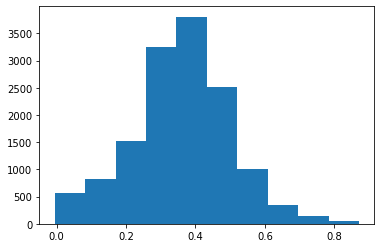

In [125]:
plt.hist(NDVI_circle_index)